In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [6]:
# load the dataset
df = pd.read_excel("../scraping-v2/metadata.xlsx", sheet_name="Sheet1")
df.head()

,Unnamed: 0,Name,TITLE,organism,mol_type,strain,isolate,db_xref,geo_loc_name,note,clone,isolation_source,host,collection_date,collected_by,lab_host,lat_lon,serotype,identified_by
0,0,NC_009942.1,West Nile alternative open reading frame (...,"""West Nile virus""","""genomic RNA""","""NY99""","""385-99""","""taxon:11082""","""USA""","""lineage 1; Vero cell passage 2 after isolation""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NC_001563.2,NS1' of flaviviruses in the Japanese encep...,"""West Nile virus""","""genomic RNA""","""956""",NaN,"""taxon:11082""",NaN,"""lineage 2""","""33/G8; 34/F6""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,PP524755.1,Continuous and Dynamic Circulation of West...,"""West Nile virus""","""genomic RNA""",NaN,"""RO_moR23-25/2023""","""taxon:11082""","""Romania""",NaN,NaN,"""mosquito pool""","""Culex pipiens""","""2023""",NaN,NaN,NaN,NaN,NaN
3,3,PP524756.1,Continuous and Dynamic Circulation of West...,"""West Nile virus""","""genomic RNA""",NaN,"""RO_moR23-57/2023""","""taxon:11082""","""Romania""",NaN,NaN,"""mosquito pool""","""Culex pipiens""","""2023""",NaN,NaN,NaN,NaN,NaN
4,4,LC817237.1,African lineage 1a West Nile virus isolate...,"""West Nile virus""","""genomic RNA""",NaN,"""Croc110_2019_1_ZM""","""taxon:11082""","""Zambia""",NaN,NaN,NaN,"""Crocodylus niloticus""","""2019""",NaN,NaN,NaN,NaN,NaN


In [7]:
df["host"].isna().sum()

199

In [8]:
# load counts files
count_mosquito = pd.read_excel("counts.xlsx", sheet_name="mosquito")
count_bird = pd.read_excel("counts.xlsx", sheet_name="bird-group")

In [9]:
count_mosquito[["species", "count"]]


,species,count
0,Culex pipiens,135
1,Culex quinquefasciatus,221
2,Culex restuans,85
3,Culex tarsalis,232
4,other,46
5,other Culex species,28


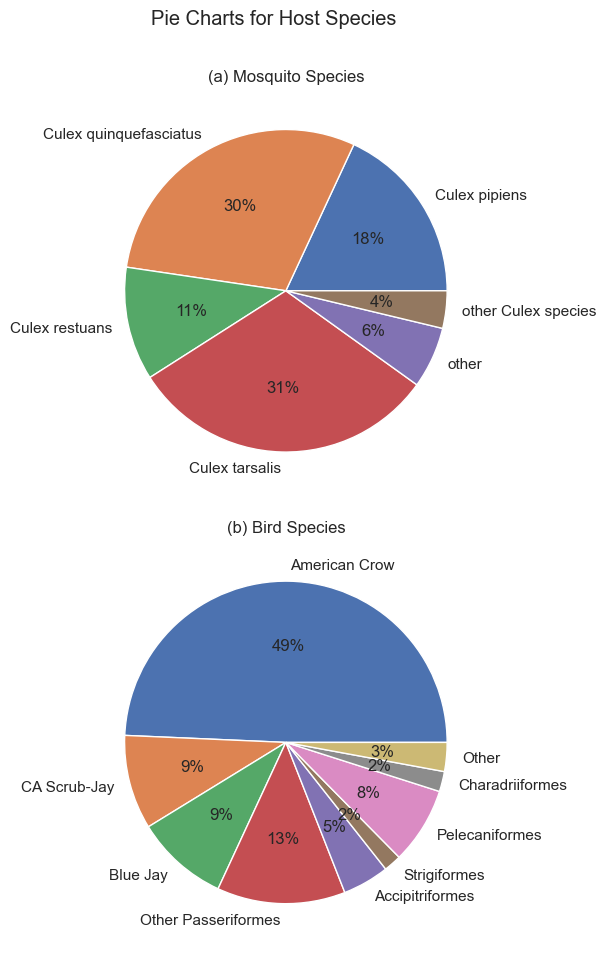

In [17]:
# use subplots for pie charts
fig, (ax1, ax2) = plt.subplots(2,1, figsize = [15, 10])
fig.suptitle('Pie Charts for Host Species')
fig.tight_layout()
fig.subplots_adjust(top=0.9)

ax1.pie(count_mosquito["count"], labels = count_mosquito["species"], autopct='%1.f%%')
ax1.set_title('(a) Mosquito Species')
ax2.pie(count_bird["Count"], labels = count_bird["Taxnomic Group"], autopct='%1.f%%')
ax2.set_title("(b) Bird Species")

fig.savefig("species.png", dpi = 300)

In [96]:
count_bird[["Taxnomic Group", "Count"]]

,Taxnomic Group,Count
0,American Crow,391
1,CA Scrub-Jay,75
2,Blue Jay,74
3,Other Passeriformes,102
4,Accipitriformes,37
5,Strigiformes,14
6,Pelecaniformes,61
7,Charadriiformes,16
8,Other,23


In [ ]:
# check time metadata

In [78]:
time_counts = df["collection_time"].apply(lambda x: str(x)[:4]).value_counts()
time_counts.sort_index(inplace=True)
time_counts = time_counts[1:]

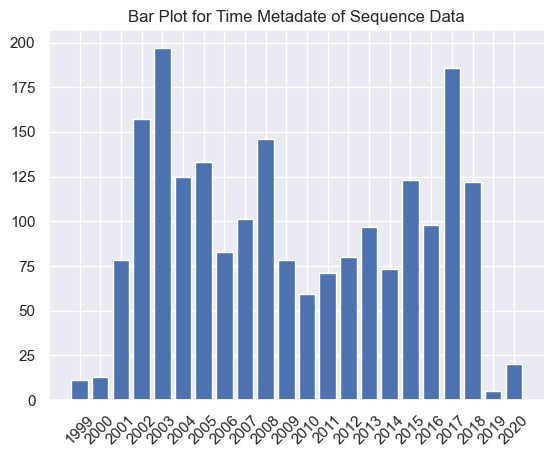

In [84]:
plt.bar(time_counts.index, list(time_counts))
plt.title('Bar Plot for Time Metadate of Sequence Data')

plt.xticks(rotation=45)
plt.savefig("time metadata.png")

In [ ]:
# first attempt to plot pie chart for host species

In [47]:
counts = df['host_species'].value_counts() 

print(counts.to_string())

host_species
Culex tarsalis                  217
American Crow                   208
American Crow                   180
Culex quinquefasciatus          172
Culex pipiens                    97
Culex restuans                   85
CA Scrub-Jay                     75
Blue Jay                         67
American White Pelican           55
Culex quinq.                     46
human- plasma                    34
Yellow-billed Magpie             32
Crow                             31
Culex. pipiens                   23
Western Scrub-Jay                17
House Finch                      15
House Sparrow                    13
Culex. PIPIENS                   11
Culex sp.                        11
Hawk                             11
Great Horned Owl                 10
Culex salinarius                 10
Cs. melanura                     10
Culex. tarsalis                  10
American Robin                    9
Sharp-shinned hawk                9
Western Scrub Jay                 9
Culex pipiens/r

In [51]:
with pd.ExcelWriter("counts.xlsx") as writer:  
    for host in ["mosquito", "bird"]: 
        counts = df[df["host"] == host]['host_species'].value_counts() 

        df_counts = pd.DataFrame(data={"species":list(counts.index),"count":list(counts)})
        df_counts.to_excel(writer, sheet_name=host)

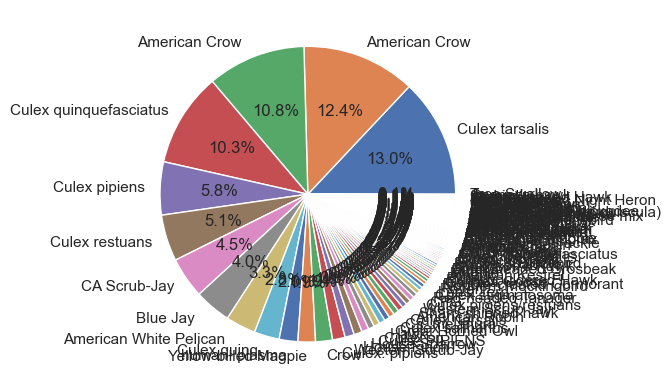

In [40]:
plt.pie(df["count"]/ sum(df["count"]), labels = df["species"], autopct='%1.1f%%')
plt.show() 

In [1]:
# location metadata

In [47]:
count_state = df['state'].value_counts()
df_state = pd.DataFrame(data={"State":count_state.index, "Count":list(count_state)})
df_state.loc[41,"State"] = "CT"

# plt.pie(df_state["Count"]/ sum(df_state["Count"]), labels = df_state["State"], autopct='%1.1f%%')
# plt.show() 

df_state_top10 = df_state[:10]
df_state_top10

,State,Count
0,CA,942
1,CT,160
2,MN,134
3,IA,120
4,CO,112
5,NY,87
6,IL,61
7,LA,49
8,TX,48
9,NH,41


In [48]:
df_state_top10.loc[-1] = ["Other", sum(df_state[10:]["Count"])]  # adding a row
df_state_top10.index = df_state_top10.index + 1  # shifting index
df_state_top10 = df_state_top10.sort_index()
df_state_top10

/var/folders/pf/xbfnf82j50d4lq3dvt97gm5c0000gn/T/ipykernel_3742/1360040725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_top10.loc[-1] = ["Other", sum(df_state[10:]["Count"])]  # adding a row


,State,Count
0,Other,328
1,CA,942
2,CT,160
3,MN,134
4,IA,120
5,CO,112
6,NY,87
7,IL,61
8,LA,49
9,TX,48


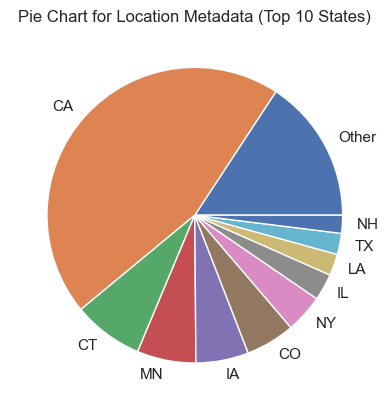

In [83]:
plt.pie(df_state_top10["Count"], labels = df_state_top10["State"])
plt.title("Pie Chart for Location Metadata (Top 10 States)") 
# plt.ylabel("Count")
# plt.xlabel("State")

plt.savefig("states (top 10).png")


In [11]:
df_state

,State,Count
0,CA,942
1,CT,160
2,MN,134
3,IA,120
4,CO,112
5,NY,87
6,IL,61
7,LA,49
8,TX,48
9,NH,41


In [21]:
df2

,ecotype_size,file_name
0,102,result_88.xml
1,129,result_77.xml
2,224,result_63.xml
3,229,result_232.xml
4,109,result_226.xml
...,...,...
495,110,result_217.xml
496,107,result_46.xml
497,159,result_52.xml
498,106,result_85.xml


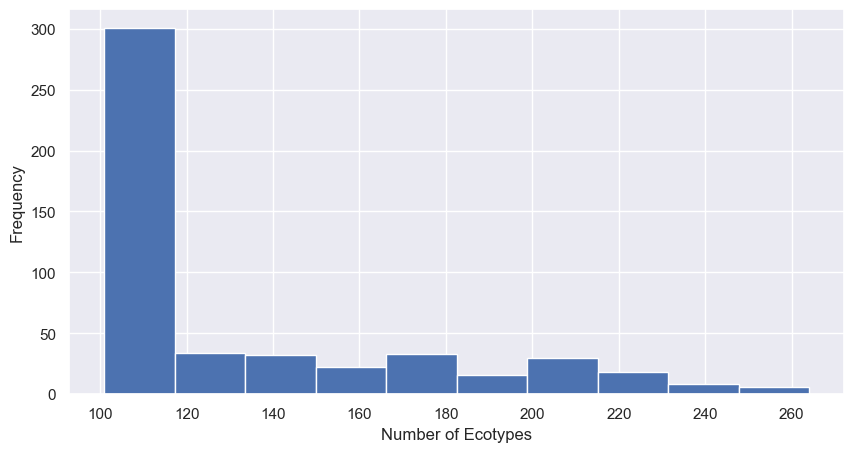

In [19]:
df2 = pd.read_csv("../ecotype_simulation/ecotype_result.csv")
plt.hist(df2["ecotype_size"])
plt.xlabel("Number of Ecotypes")
plt.ylabel("Frequency")
# plt.title("Histogram for Numbers of Ecotypes from 500 Simulations")
plt.rcParams["figure.figsize"] = (8,4)
plt.savefig("ecotype.png")

<Axes: xlabel='ecotype_size'>

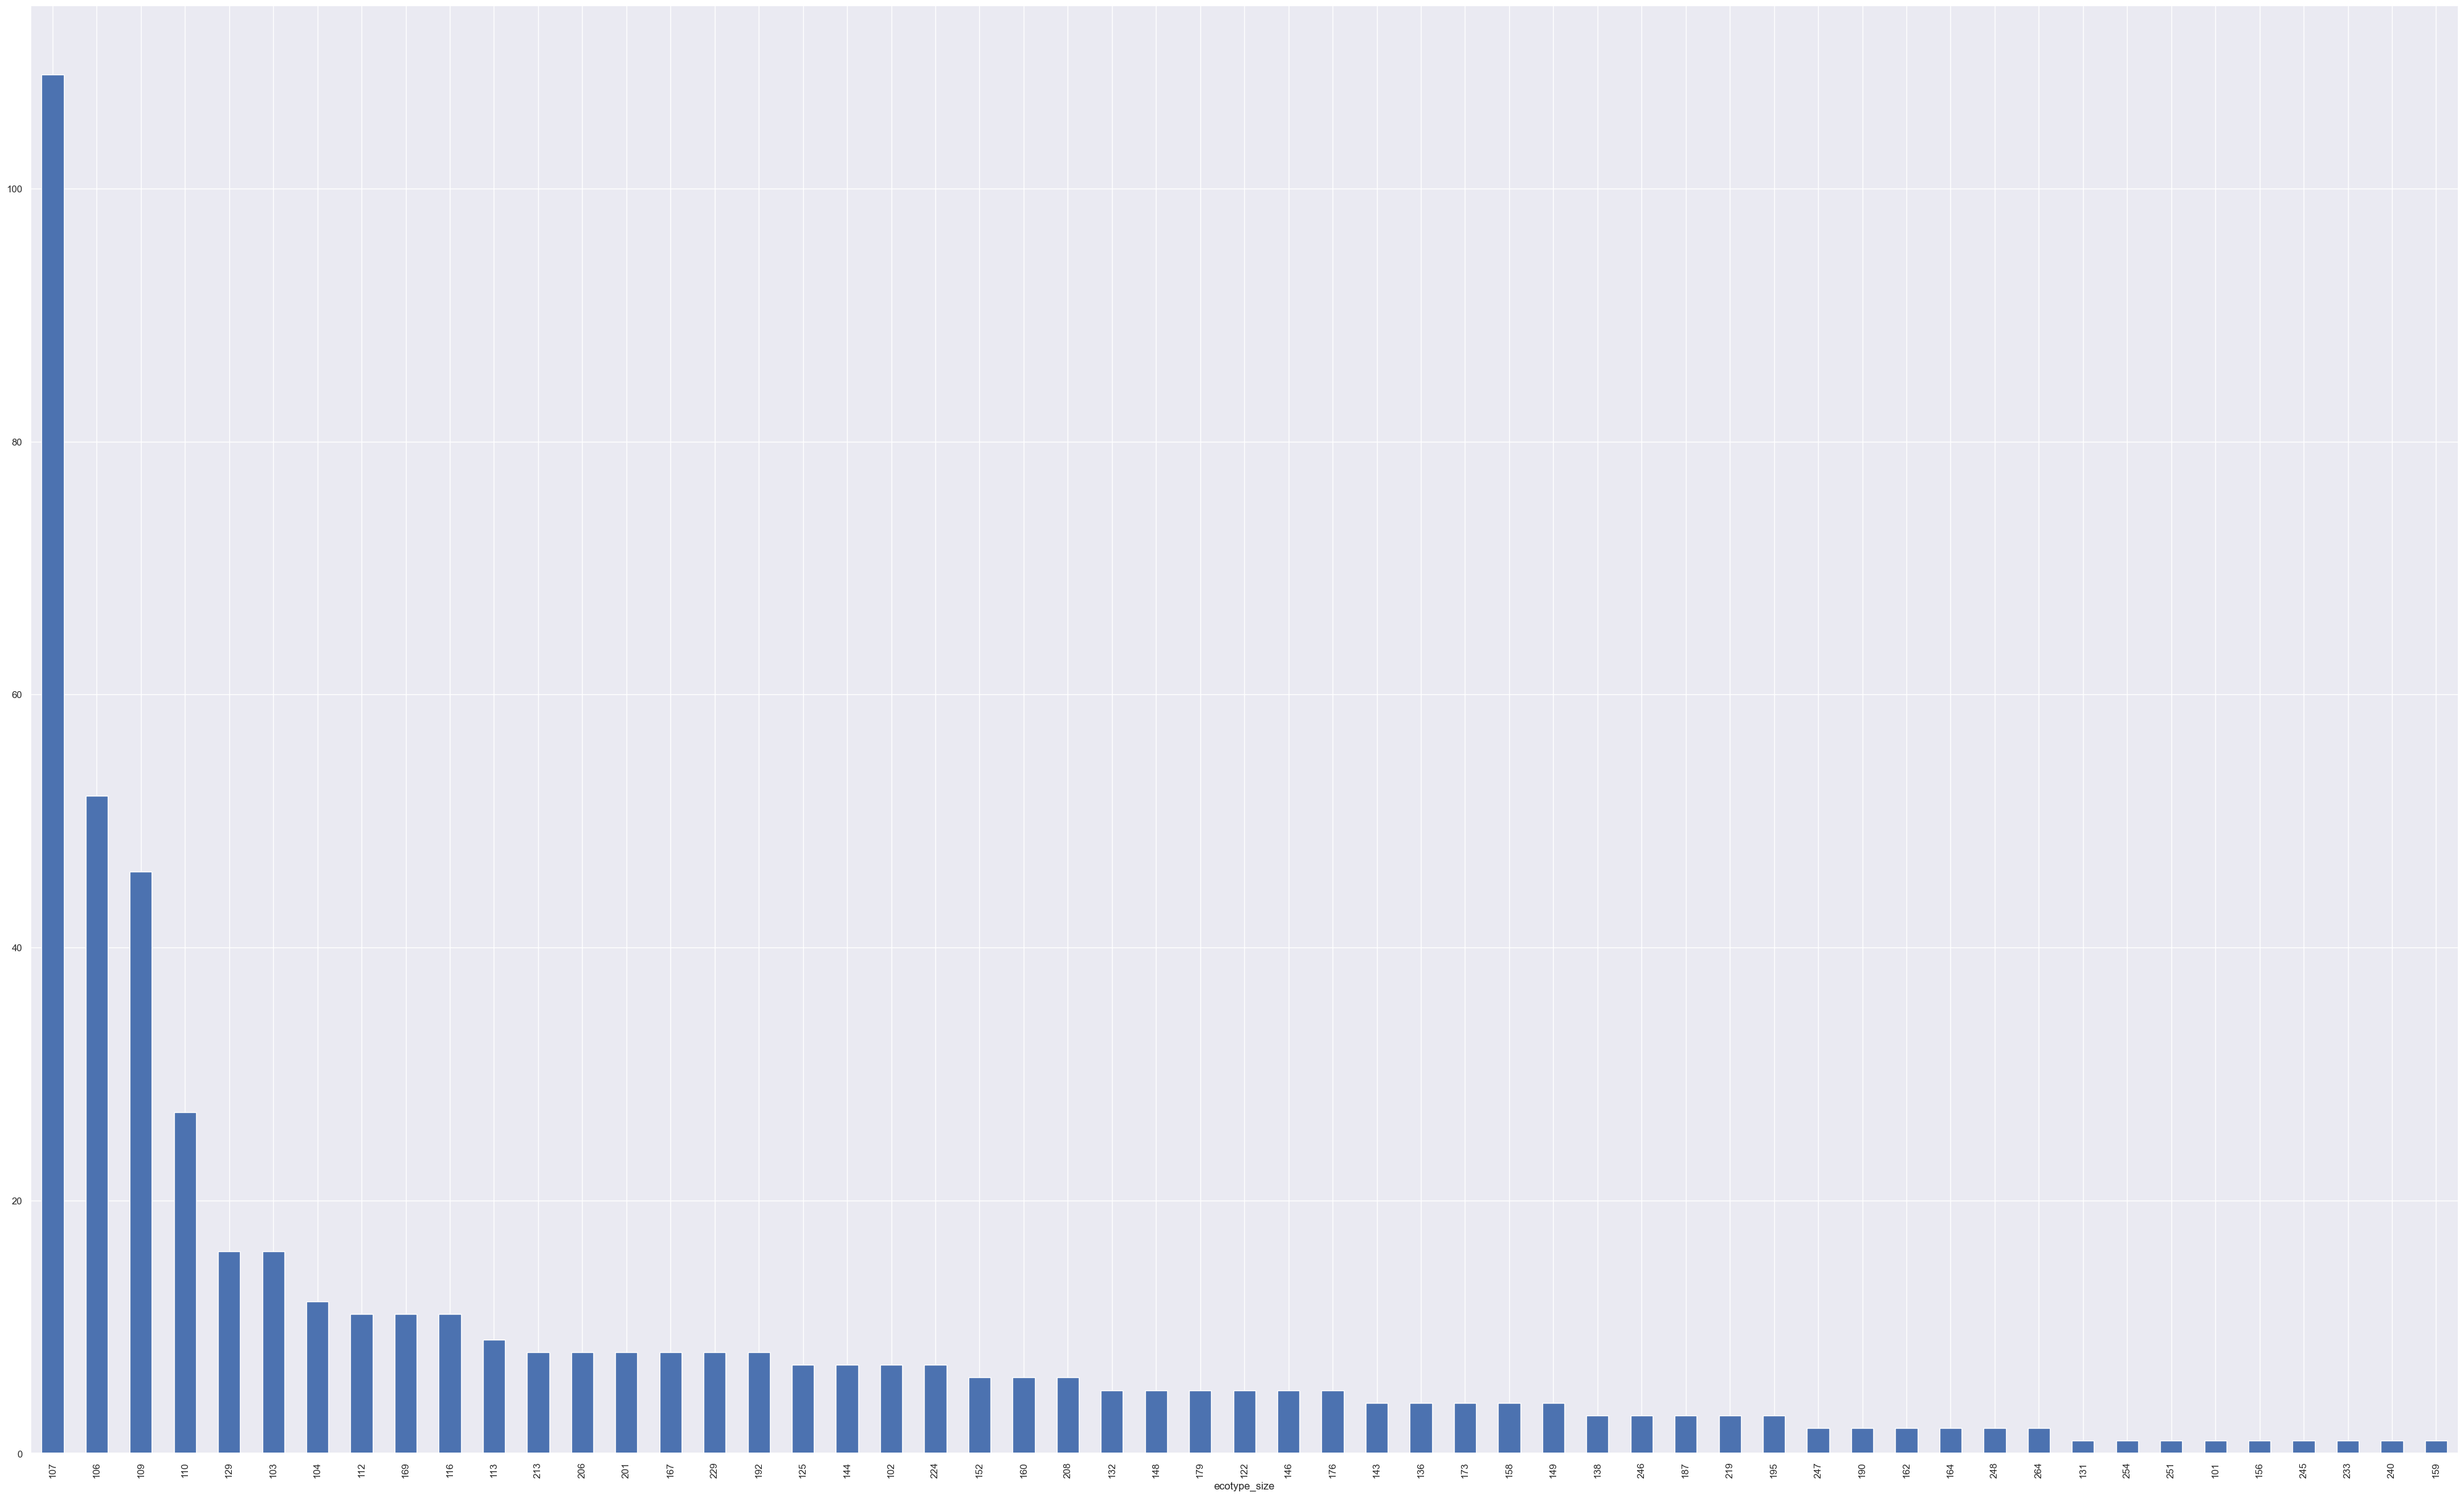

In [35]:
fig, ax = plt.subplots()
df2["ecotype_size"].value_counts().plot(ax=ax, kind='bar')


In [36]:
df2["ecotype_size"].value_counts()

ecotype_size
107    109
106     52
109     46
110     27
129     16
103     16
104     12
112     11
169     11
116     11
113      9
213      8
206      8
201      8
167      8
229      8
192      8
125      7
144      7
102      7
224      7
152      6
160      6
208      6
132      5
148      5
179      5
122      5
146      5
176      5
143      4
136      4
173      4
158      4
149      4
138      3
246      3
187      3
219      3
195      3
247      2
190      2
162      2
164      2
248      2
264      2
131      1
254      1
251      1
101      1
156      1
245      1
233      1
240      1
159      1
Name: count, dtype: int64